### IBM Data Science Capstone

In [1048]:
import pandas as pd
import numpy as np
from unicodedata import normalize
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import seaborn as sns

In [532]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [533]:
pwd

'C:\\Users\\usmanahmad\\Desktop'

In [1093]:


CJ = pd.read_csv(r'C:\Users\usmanahmad\Desktop\DPD_Carjacking_Offenses_Victims_Confirmed.csv')
CJ.head()


,FID,X,Y,DAY,DATE,TIME,REPORT_NO,PRECINCT,ADDRESS,CITY,STATE,Scout_Car_Areas,Zip_Codes,Detroit_Neighborhoods,Hardest_Hit_Fund_Areas,Counties,City_Council_Districts,ObjectId
0,NaN,-83.047853,42.332916,NaN,1475625600000,3:00:00 AM,1610050044,1.0,15TH/POPLAR,DETROIT,MI,4.0,20014,142.0,NaN,1345,5.0,1
1,NaN,-83.047853,42.332916,NaN,1482278400000,10:45:00 PM,1220160339,8.0,192XX SCHOOLCRAFT,DETROIT,MI,4.0,20014,142.0,NaN,1345,5.0,2
2,NaN,-83.047853,42.332916,NaN,1472428800000,7:00:00 PM,1608280288,8.0,GREENVIEW/FARGO,DETROIT,MI,4.0,20014,142.0,NaN,1345,5.0,3
3,NaN,-83.047853,42.332916,NaN,1477785600000,10:30:00 PM,1610290659,6.0,LIVERNOIS/PURITAN,DETROIT,MI,4.0,20014,142.0,NaN,1345,5.0,4
4,NaN,-83.047853,42.332916,NaN,1481328000000,4:30:00 AM,1612100074,11.0,204XX MARX,DETROIT,MI,4.0,20014,142.0,NaN,1345,5.0,5


In [1094]:
CJ1 = CJ[['X','Y', 'DAY', 'DATE', 'TIME', 'PRECINCT', 'ADDRESS', 'Zip_Codes']] 
CJ1.dropna(inplace = True)
CJ1.reset_index(drop = True, inplace = True)
CJ1

<ipython-input-1094-79e068f4a3cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1.dropna(inplace = True)


,X,Y,DAY,DATE,TIME,PRECINCT,ADDRESS,Zip_Codes
0,-82.992430,42.436570,Wednesday,1434499200000,4:30:00 PM,9.0,WESTPHALIA AND LAPPIN,15295
1,-83.179793,42.417333,Wednesday,1448409600000,7:45:00 AM,12.0,171XX SCHAEFER,20021
2,-83.188038,42.380073,Sunday,1431820800000,9:00:00 PM,2.0,HUBBELL AND FULLERTON,20015
3,-83.231968,42.386374,Monday,1433721600000,9:50:00 PM,6.0,WESTWOOD AND SCHOOLCRAFT,19616
4,-83.157358,42.398003,Tuesday,1438041600000,12:20:00 AM,10.0,INDIANA AND EATON,20449
...,...,...,...,...,...,...,...,...
829,-82.980505,42.430664,Sunday,1492300800000,2:30am,9.0,139XX GRATIOT,15295
830,-83.069374,42.419500,Tuesday,1505779200000,3:08am,11.0,171XX CHAREST,7316
831,-83.184027,42.393519,Wednesday,1506470400000,9:00pm,12.0,PURITAN / HARTWELL,20015
832,-83.114798,42.432197,Sunday,1507420800000,8:30am,12.0,W 7 MILE RD / WOODWARD,14767


In [1047]:
for i in range (len(CJ1)):
    CJ1['DATE'][i] =  pd.to_datetime(CJ1['DATE'][i], unit='ms')
CJ1

<ipython-input-1047-9f6ba0b83272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['DATE'][i] =  pd.to_datetime(CJ1['DATE'][i], unit='ms')
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1031: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.us

,X,Y,DAY,DATE,TIME,PRECINCT,ADDRESS,Zip_Codes
0,-82.992430,42.436570,Wednesday,2015-06-17 00:00:00,4:30:00 PM,9.0,WESTPHALIA AND LAPPIN,15295
1,-83.179793,42.417333,Wednesday,2015-11-25 00:00:00,7:45:00 AM,12.0,171XX SCHAEFER,20021
2,-83.188038,42.380073,Sunday,2015-05-17 00:00:00,9:00:00 PM,2.0,HUBBELL AND FULLERTON,20015
3,-83.231968,42.386374,Monday,2015-06-08 00:00:00,9:50:00 PM,6.0,WESTWOOD AND SCHOOLCRAFT,19616
4,-83.157358,42.398003,Tuesday,2015-07-28 00:00:00,12:20:00 AM,10.0,INDIANA AND EATON,20449
...,...,...,...,...,...,...,...,...
829,-82.980505,42.430664,Sunday,2017-04-16 00:00:00,2:30am,9.0,139XX GRATIOT,15295
830,-83.069374,42.419500,Tuesday,2017-09-19 00:00:00,3:08am,11.0,171XX CHAREST,7316
831,-83.184027,42.393519,Wednesday,2017-09-27 00:00:00,9:00pm,12.0,PURITAN / HARTWELL,20015
832,-83.114798,42.432197,Sunday,2017-10-08 00:00:00,8:30am,12.0,W 7 MILE RD / WOODWARD,14767


<AxesSubplot:xlabel='Count', ylabel='DATE'>

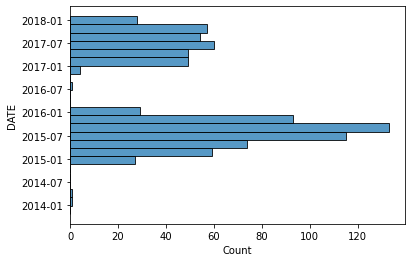

In [1059]:
sns.histplot(data=CJ1, y="DATE", binwidth = 65,  binrange = (16000, 17500))

<AxesSubplot:xlabel='PRECINCT', ylabel='Count'>

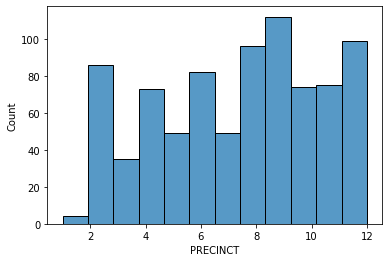

In [1054]:
sns.histplot(data=CJ1, x="PRECINCT", bins = 12)

In [1095]:
import re
for i in range (len(CJ1)):
    CJ1['DAY'][i] = re.findall(r'\w+',CJ1['DAY'][i])[0]
CJ1.replace('THURSDAY', 'Thursday', inplace = True)
CJ1['DAY'].value_counts()

<ipython-input-1095-5f9d730a82af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['DAY'][i] = re.findall(r'\w+',CJ1['DAY'][i])[0]
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return sup

Sunday       156
Saturday     129
Monday       119
Wednesday    115
Friday       108
Thursday     106
Tuesday      101
Name: DAY, dtype: int64

<AxesSubplot:>

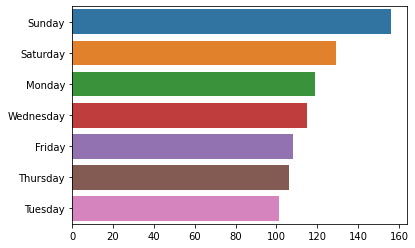

In [943]:
sns.barplot(x=CJ1['DAY'].value_counts().values , y=CJ1['DAY'].value_counts().index)

In [1096]:
Days_onehot = pd.get_dummies(CJ1['DAY'])
CJ1[Days_onehot.columns.to_list()] = Days_onehot
CJ1.drop(['DAY'], axis = 1, inplace = True)
CJ1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X,Y,DATE,TIME,PRECINCT,ADDRESS,Zip_Codes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,-82.992430,42.436570,1434499200000,4:30:00 PM,9.0,WESTPHALIA AND LAPPIN,15295,0,0,0,0,0,0,1
1,-83.179793,42.417333,1448409600000,7:45:00 AM,12.0,171XX SCHAEFER,20021,0,0,0,0,0,0,1
2,-83.188038,42.380073,1431820800000,9:00:00 PM,2.0,HUBBELL AND FULLERTON,20015,0,0,0,1,0,0,0
3,-83.231968,42.386374,1433721600000,9:50:00 PM,6.0,WESTWOOD AND SCHOOLCRAFT,19616,0,1,0,0,0,0,0
4,-83.157358,42.398003,1438041600000,12:20:00 AM,10.0,INDIANA AND EATON,20449,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,-82.980505,42.430664,1492300800000,2:30am,9.0,139XX GRATIOT,15295,0,0,0,1,0,0,0
830,-83.069374,42.419500,1505779200000,3:08am,11.0,171XX CHAREST,7316,0,0,0,0,0,1,0
831,-83.184027,42.393519,1506470400000,9:00pm,12.0,PURITAN / HARTWELL,20015,0,0,0,0,0,0,1
832,-83.114798,42.432197,1507420800000,8:30am,12.0,W 7 MILE RD / WOODWARD,14767,0,0,0,1,0,0,0


In [1097]:
CJ1.replace('UNKNOWN', np.nan, inplace = True)
CJ1.replace('216:am', '2:16am', inplace = True)
CJ1.replace('3;00am', '3:00am', inplace = True)
CJ1['TIME'].dtype
CJ1.dropna(inplace = True)
CJ1.reset_index(drop = True, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-1097-d77b3d5e34ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1.dropna(inplace = True)


In [571]:
CJ1

,X,Y,DATE,TIME,PRECINCT,ADDRESS,Zip_Codes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,-82.992430,42.436570,1434499200000,4:30:00 PM,9.0,WESTPHALIA AND LAPPIN,15295,0,0,0,0,0,0,1
1,-83.179793,42.417333,1448409600000,7:45:00 AM,12.0,171XX SCHAEFER,20021,0,0,0,0,0,0,1
2,-83.188038,42.380073,1431820800000,9:00:00 PM,2.0,HUBBELL AND FULLERTON,20015,0,0,0,1,0,0,0
3,-83.231968,42.386374,1433721600000,9:50:00 PM,6.0,WESTWOOD AND SCHOOLCRAFT,19616,0,1,0,0,0,0,0
4,-83.157358,42.398003,1438041600000,12:20:00 AM,10.0,INDIANA AND EATON,20449,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,-82.980505,42.430664,1492300800000,2:30am,9.0,139XX GRATIOT,15295,0,0,0,1,0,0,0
829,-83.069374,42.419500,1505779200000,3:08am,11.0,171XX CHAREST,7316,0,0,0,0,0,1,0
830,-83.184027,42.393519,1506470400000,9:00pm,12.0,PURITAN / HARTWELL,20015,0,0,0,0,0,0,1
831,-83.114798,42.432197,1507420800000,8:30am,12.0,W 7 MILE RD / WOODWARD,14767,0,0,0,1,0,0,0


In [1098]:
from datetime import *
for i in range (len(CJ1)):
    
    try:
        CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M:%S %p')
        
    except:
        try:
            CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M%p')
        
        except:
             try:
                CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M %p')
            
             except:
                try:
                    CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M')
                    
                except:
                    CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M%p ')
        
            
for i in range (len(CJ1)): 
    CJ1['TIME'][i] = datetime.strftime(CJ1['TIME'][i], '%H:%M')
   
    
   
    



<ipython-input-1098-6775d53ecd1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M:%S %p')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-1098-6775d53ecd1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['TIME'][i] = datetime.str

In [1005]:
for i in range (len(CJ1)):
    CJ1['TIME'][i] =  pd.to_datetime(CJ1['TIME'][i], format='%H:%M', errors='ignore')
CJ1

<ipython-input-1005-1c4accb58432>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['TIME'][i] =  pd.to_datetime(CJ1['TIME'][i], format='%H:%M', errors='ignore')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,DATE,TIME,PRECINCT,ADDRESS,Zip_Codes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,-82.992430,42.436570,2015-06-17,1900-01-01 16:30:00,9.0,WESTPHALIA AND LAPPIN,15295,0,0,0,0,0,0,1
1,-83.179793,42.417333,2015-11-25,1900-01-01 07:45:00,12.0,171XX SCHAEFER,20021,0,0,0,0,0,0,1
2,-83.188038,42.380073,2015-05-17,1900-01-01 21:00:00,2.0,HUBBELL AND FULLERTON,20015,0,0,0,1,0,0,0
3,-83.231968,42.386374,2015-06-08,1900-01-01 21:50:00,6.0,WESTWOOD AND SCHOOLCRAFT,19616,0,1,0,0,0,0,0
4,-83.157358,42.398003,2015-07-28,1900-01-01 00:20:00,10.0,INDIANA AND EATON,20449,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,-82.980505,42.430664,2017-04-16,1900-01-01 02:30:00,9.0,139XX GRATIOT,15295,0,0,0,1,0,0,0
829,-83.069374,42.419500,2017-09-19,1900-01-01 03:08:00,11.0,171XX CHAREST,7316,0,0,0,0,0,1,0
830,-83.184027,42.393519,2017-09-27,1900-01-01 21:00:00,12.0,PURITAN / HARTWELL,20015,0,0,0,0,0,0,1
831,-83.114798,42.432197,2017-10-08,1900-01-01 08:30:00,12.0,W 7 MILE RD / WOODWARD,14767,0,0,0,1,0,0,0


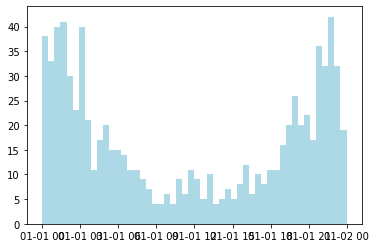

<AxesSubplot:xlabel='Count', ylabel='TIME'>

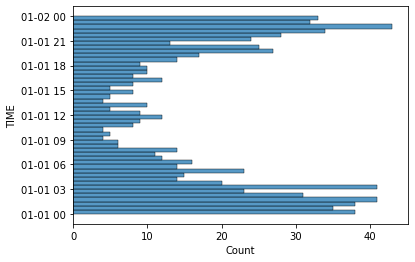

In [1014]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot it
fig, ax = plt.subplots(1,1)
ax.hist(CJ1['TIME'], bins=50, color='lightblue')

plt.show()
sns.histplot(data=CJ1, y="TIME", bins = 48)

In [1099]:


import json # library to handle JSON files



import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



In [5]:
address = 'Detroit, MI'

geolocator = Nominatim(user_agent="Detroit_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Detroit City are {}, {}.'.format(latitude, longitude))

NameError: name 'Nominatim' is not defined

In [1100]:
CLIENT_ID = 'M5O4KRWYJ4VCN23KA1KH32MN3F2SH10JR24HFW1AXRBXTCWL' # your Foursquare ID
CLIENT_SECRET = 'MNTCSX11MPSQ02TSUAK1JD4VMLJ01Q5QFZ3MIG1NOX0RRW3B' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M5O4KRWYJ4VCN23KA1KH32MN3F2SH10JR24HFW1AXRBXTCWL
CLIENT_SECRET:MNTCSX11MPSQ02TSUAK1JD4VMLJ01Q5QFZ3MIG1NOX0RRW3B


In [1101]:
def getNearbyVenues(latitudes, longitudes, radius=500):
    
    venues_list=[]
    for lat, lng in zip(latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([( 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1102]:
Detroit_venues = getNearbyVenues(latitudes=CJ1['Y'],
                                   longitudes=CJ1['X']
                                  )

In [632]:
Detroit_venues.groupby('Neighbourhood Latitude').count()

,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood Latitude,,,,,
42.268590,4,4,4,4,4
42.269960,3,3,3,3,3
42.270592,3,3,3,3,3
42.272133,3,3,3,3,3
42.272254,3,3,3,3,3
...,...,...,...,...,...
42.447371,5,5,5,5,5
42.448268,5,5,5,5,5
42.449185,15,15,15,15,15


In [633]:
Detroit_onehot = pd.get_dummies(Detroit_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Detroit_onehot['Neighbourhood Latitude'] = Detroit_venues['Neighbourhood Latitude'] 

# move neighborhood column to the first column
fixed_columns = [Detroit_onehot.columns[-1]] + list(Detroit_onehot.columns[:-1])
Detroit_onehot = Detroit_onehot[fixed_columns]

Detroit_onehot.head()

,Neighbourhood Latitude,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,42.436570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42.436570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42.436570,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.436570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42.417333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [634]:
Detroit_grouped = Detroit_onehot.groupby('Neighbourhood Latitude').mean().reset_index()
Detroit_grouped

,Neighbourhood Latitude,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,42.268590,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.269960,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.270592,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.272133,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42.272254,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,42.447371,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,42.448268,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717,42.449185,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718,42.450008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Clustering Neighbourhoods

In [635]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [815]:
# set number of clusters

kclusters = 16

Detroit_grouped_clustering = Detroit_grouped.join(CJ1.set_index('Y'), on='Neighbourhood Latitude')

Detroit_grouped_clustering1 = Detroit_grouped_clustering.drop(['Zip_Codes'],axis = 1)

Detroit_grouped_clustering.drop(['DATE', 'TIME', 'ADDRESS', 'PRECINCT', 'Zip_Codes'],axis = 1, inplace = True)
Detroit_grouped_clustering1.reset_index(drop = True, inplace = True)
Detroit_grouped_clustering.dropna(inplace = True)
Detroit_grouped_clustering.reset_index(drop = True, inplace = True)
Detroit_grouped_clustering

,Neighbourhood Latitude,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Yoga Studio,Zoo,X,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,42.268590,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-83.164052,0,0,0,0,1,0,0
1,42.269960,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-83.159098,1,0,0,0,0,0,0
2,42.270592,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-83.160332,0,0,0,0,1,0,0
3,42.272133,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-83.157327,0,1,0,0,0,0,0
4,42.272254,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-83.158948,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,42.447371,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-82.996549,0,0,0,1,0,0,0
805,42.448268,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-82.995449,1,0,0,0,0,0,0
806,42.449185,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-82.963293,1,0,0,0,0,0,0
807,42.450008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,-82.958107,0,0,0,0,0,0,1


In [816]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Detroit_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([ 4, 11,  4, 10,  1,  2,  5, 11,  1,  1,  5, 11,  1, 15, 15,  2, 10,
       15,  4, 15,  1,  1, 11,  1, 15,  4, 11,  4, 11,  1, 15,  4, 15, 10,
       10,  1,  2,  2,  1,  2, 15,  4,  1, 15, 11,  2, 10,  5,  5, 10,  4,
        1, 15,  2,  2, 10,  4,  2, 11,  5, 15,  1, 10,  4, 15,  1,  2, 15,
        2, 11, 15, 15, 10,  2, 10,  1, 10, 15,  1, 10, 15,  2, 10, 11, 15,
       10, 15, 11,  4, 15, 11,  1, 10,  2,  2, 10,  1, 11,  1,  2,  4,  1,
        2,  2,  1, 15,  4, 10,  4,  1, 11, 15, 10,  1, 10,  4,  5,  1,  5,
       11,  1,  5,  2, 11,  5,  4,  1,  1, 15,  4,  2,  4,  5,  5, 10,  1,
        4,  5, 15,  5, 15, 15,  1, 15,  1, 15,  4, 10,  2, 10,  4,  5,  1,
        4,  5, 15,  2,  5,  4,  9, 15, 11,  5,  5,  1,  4,  5,  1,  2, 10,
        2,  1,  5, 10, 10,  1,  1, 10,  9,  1,  4,  3,  1, 10, 15, 10, 10,
        5,  2, 15, 11,  5, 15, 10,  2,  6,  1, 15, 11, 11, 14, 10, 11,  4,
        4, 11, 15,  2,  2, 10,  1,  1, 10,  5,  4,  1,  4,  1,  5,  4,  4,
        5, 15, 11,  4,  2

In [817]:
Detroit_org = Detroit_grouped_clustering.drop(['X',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday'], axis = 1)


In [818]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [819]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood Latitude']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood Latitude'] = Detroit_org['Neighbourhood Latitude']

for ind in np.arange(Detroit_org.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Detroit_org.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,42.268590,Deli / Bodega,Intersection,Storage Facility,Seafood Restaurant,Ramen Restaurant,Racetrack,Nightclub,Record Shop,Nightlife Spot,Noodle House
1,42.269960,Seafood Restaurant,Park,Bakery,ATM,Other Repair Shop,Pawn Shop,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,Optical Shop
2,42.270592,Seafood Restaurant,Public Art,Bakery,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture
3,42.272133,Seafood Restaurant,Public Art,Bakery,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture
4,42.272254,Seafood Restaurant,Public Art,Bakery,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture
...,...,...,...,...,...,...,...,...,...,...,...
804,42.447371,Grocery Store,Furniture / Home Store,Intersection,Breakfast Spot,Optical Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop
805,42.448268,Grocery Store,Furniture / Home Store,Intersection,Breakfast Spot,Optical Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop
806,42.449185,Discount Store,Bagel Shop,Intersection,Donut Shop,Cosmetics Shop,Fast Food Restaurant,Pizza Place,Pharmacy,Shoe Store,Shop & Service
807,42.450008,Bank,Fried Chicken Joint,Shop & Service,Pizza Place,Marijuana Dispensary,Outdoors & Recreation,Pawn Shop,Park,Paintball Field,ATM


In [927]:
neighborhoods_venues_sorted['Cluster Labels'] =  kmeans.labels_

neighborhoods_venues_sorted[['X','ADDRESS', 'PRECINCT', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']] = Detroit_grouped_clustering1[['X','ADDRESS', 'PRECINCT', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']]

neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()[:10]

Restaurant             74
ATM                    54
American Restaurant    33
Discount Store         33
Optical Shop           31
Grocery Store          28
Pizza Place            28
Liquor Store           26
Sandwich Place         25
Intersection           22
Name: 3rd Most Common Venue, dtype: int64

In [821]:
Detroit_merged = neighborhoods_venues_sorted
Detroit_merged.dropna(axis = 0, inplace = True)
Detroit_merged

,Neighbourhood Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,X,ADDRESS,PRECINCT,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,42.268590,Deli / Bodega,Intersection,Storage Facility,Seafood Restaurant,Ramen Restaurant,Racetrack,Nightclub,Record Shop,Nightlife Spot,...,-83.164052,29XX S. GREYFRIARS,4.0,0,0,0,0,1,0,0
1,42.269960,Seafood Restaurant,Park,Bakery,ATM,Other Repair Shop,Pawn Shop,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,...,-83.159098,EDSEL AND OMAHA,4.0,1,0,0,0,0,0,0
2,42.270592,Seafood Restaurant,Public Art,Bakery,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,...,-83.160332,26XX S FORT,4.0,0,0,0,0,1,0,0
3,42.272133,Seafood Restaurant,Public Art,Bakery,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,...,-83.157327,23XX S. EDSEL ST.,4.0,0,1,0,0,0,0,0
4,42.272254,Seafood Restaurant,Public Art,Bakery,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,...,-83.158948,DOWNING AND S FORT,4.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,42.447371,Grocery Store,Furniture / Home Store,Intersection,Breakfast Spot,Optical Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,...,-82.996549,COLLINGHAM AND BARLOW,9.0,0,0,0,1,0,0,0
805,42.448268,Grocery Store,Furniture / Home Store,Intersection,Breakfast Spot,Optical Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,...,-82.995449,205XX WALTHAM ST,9.0,1,0,0,0,0,0,0
806,42.449185,Discount Store,Bagel Shop,Intersection,Donut Shop,Cosmetics Shop,Fast Food Restaurant,Pizza Place,Pharmacy,Shoe Store,...,-82.963293,154XX Carlisle,9.0,1,0,0,0,0,0,0
807,42.450008,Bank,Fried Chicken Joint,Shop & Service,Pizza Place,Marijuana Dispensary,Outdoors & Recreation,Pawn Shop,Park,Paintball Field,...,-82.958107,158XX E 8 MILE,9.0,0,0,0,0,0,0,1


In [1091]:
# create map
map_clusters = folium.Map(location=[42.3314, -83.0458], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
z = 6
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Detroit_merged['Neighbourhood Latitude'].where(Detroit_merged['Cluster Labels']==z).dropna(), Detroit_merged['X'].where(Detroit_merged['Cluster Labels']==z).dropna(), Detroit_merged['ADDRESS'].where(Detroit_merged['Cluster Labels']==z).dropna(), Detroit_merged['Cluster Labels'].where(Detroit_merged['Cluster Labels']==z).dropna()):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [1092]:
Detroit_merged.loc[Detroit_merged['Cluster Labels'] == z, Detroit_merged.columns[[1] + list(range(2, Detroit_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,...,X,ADDRESS,PRECINCT,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
195,Seafood Restaurant,Liquor Store,American Restaurant,Playground,Outdoor Sculpture,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,Other Repair Shop,...,-83.134560,TIREMAN AND CARBONDALE,10.0,1,0,0,0,0,0,0
232,Art Museum,Baseball Field,Intersection,Taco Place,Optical Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,...,-83.105921,21XX W GRAND BLVD,10.0,1,0,0,0,0,0,0
345,Construction & Landscaping,Liquor Store,American Restaurant,Outdoor Sculpture,Pedestrian Plaza,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,ATM,...,-83.117364,32XX W. BOSTON,10.0,1,0,0,0,0,0,0
372,Liquor Store,Intersection,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,Optical Shop,...,-82.957139,29XX DREXEL,5.0,1,0,0,0,0,0,0
376,Intersection,ATM,Optical Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,Opera House,...,-83.261210,128XX W OUTER DRIVE,6.0,1,0,0,0,0,0,0
377,Farm,Intersection,Construction & Landscaping,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Pet Service,Other Repair Shop,...,-83.103474,102XX ROSA PARKS BLVD,10.0,1,0,0,0,0,0,0
400,Bar,Burger Joint,Intersection,American Restaurant,Outdoor Sculpture,Pedestrian Plaza,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,...,-83.236752,141XX SCHOOLCRAFT,8.0,1,0,0,0,0,0,0
404,Intersection,Wings Joint,American Restaurant,Convenience Store,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,...,-83.139600,DAVISON AND LIVERNOIS,10.0,1,0,0,0,0,0,0
423,American Restaurant,Intersection,Fast Food Restaurant,Pharmacy,Convenience Store,Boutique,Wings Joint,Noodle House,Office,Opera House,...,-83.135907,CLEMENTS AND PETOSKEY,10.0,1,0,0,0,0,0,0
489,Discount Store,Pizza Place,American Restaurant,ATM,Other Repair Shop,Pawn Shop,Park,Paintball Field,Outdoors & Recreation,Outdoor Sculpture,...,-83.169359,FENKELL AND MYERS,2.0,1,0,0,0,0,0,0


In [1090]:
Detroit_merged.loc[Detroit_merged['Cluster Labels'] == z, Detroit_merged.columns[[1] + list(range(2, Detroit_merged.shape[1]))]]['4th Most Common Venue'].value_counts()

Grocery Store                7
New American Restaurant      7
ATM                          5
American Restaurant          5
Convenience Store            4
Steakhouse                   4
Pizza Place                  4
Discount Store               4
Pawn Shop                    4
Fried Chicken Joint          3
Sandwich Place               3
Optical Shop                 3
Bank                         3
Pharmacy                     3
Jazz Club                    2
Cosmetics Shop               2
Pedestrian Plaza             2
Coffee Shop                  2
Mobile Phone Shop            2
Other Repair Shop            2
Mexican Restaurant           2
Food                         2
Bar                          2
Playground                   2
Rock Club                    1
Intersection                 1
Bakery                       1
Thrift / Vintage Store       1
Market                       1
Latin American Restaurant    1
Carpet Store                 1
Park                         1
Bath Hou

In [624]:
Detroit_Analysis = Detroit_merged.drop(['ADDRESS'], axis = 1)

In [625]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood Latitude']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood Latitude'] = Detroit_Analysis['Neighbourhood Latitude']

for ind in np.arange(Detroit_Analysis.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Detroit_Analysis.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,42.268590,DATE,PRECINCT,Thursday,Deli / Bodega,Seafood Restaurant,Intersection,Storage Facility,Outdoor Sculpture,Outdoors & Recreation,Other Repair Shop
1,42.269960,DATE,PRECINCT,Cluster Labels,Friday,Park,Seafood Restaurant,Bakery,Recording Studio,Recreation Center,Optical Shop
2,42.270592,DATE,PRECINCT,Thursday,Public Art,Seafood Restaurant,Bakery,Outdoors & Recreation,Paintball Field,Park,Outdoor Sculpture
3,42.272133,DATE,PRECINCT,Monday,Public Art,Seafood Restaurant,Bakery,Paintball Field,Outdoors & Recreation,Park,Outdoor Sculpture
4,42.272254,DATE,Cluster Labels,PRECINCT,Saturday,Public Art,Seafood Restaurant,Bakery,Recreation Center,Recording Studio,Optical Shop
...,...,...,...,...,...,...,...,...,...,...,...
715,42.447371,DATE,PRECINCT,Sunday,Cluster Labels,Grocery Store,Furniture / Home Store,Intersection,Breakfast Spot,Outdoor Sculpture,Pedestrian Plaza
716,42.448268,DATE,PRECINCT,Cluster Labels,Friday,Grocery Store,Furniture / Home Store,Intersection,Breakfast Spot,Other Repair Shop,Pedestrian Plaza
717,42.449185,DATE,PRECINCT,Cluster Labels,Friday,Discount Store,Shoe Store,Bank,Donut Shop,Shop & Service,Cosmetics Shop
718,42.450008,DATE,Cluster Labels,PRECINCT,Wednesday,Fried Chicken Joint,Pizza Place,Marijuana Dispensary,Shop & Service,Bank,Recording Studio


In [1042]:
a = neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()[:9]
b = neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts()[:9]
c = neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()[:9]
d = neighborhoods_venues_sorted['4th Most Common Venue'].value_counts()[:9]
d

Steakhouse                 67
ATM                        53
Other Repair Shop          36
Pawn Shop                  35
American Restaurant        33
Convenience Store          30
Pizza Place                27
New American Restaurant    24
Liquor Store               23
Name: 4th Most Common Venue, dtype: int64

Text(0.5, 1.0, '4th Most Common Venue')

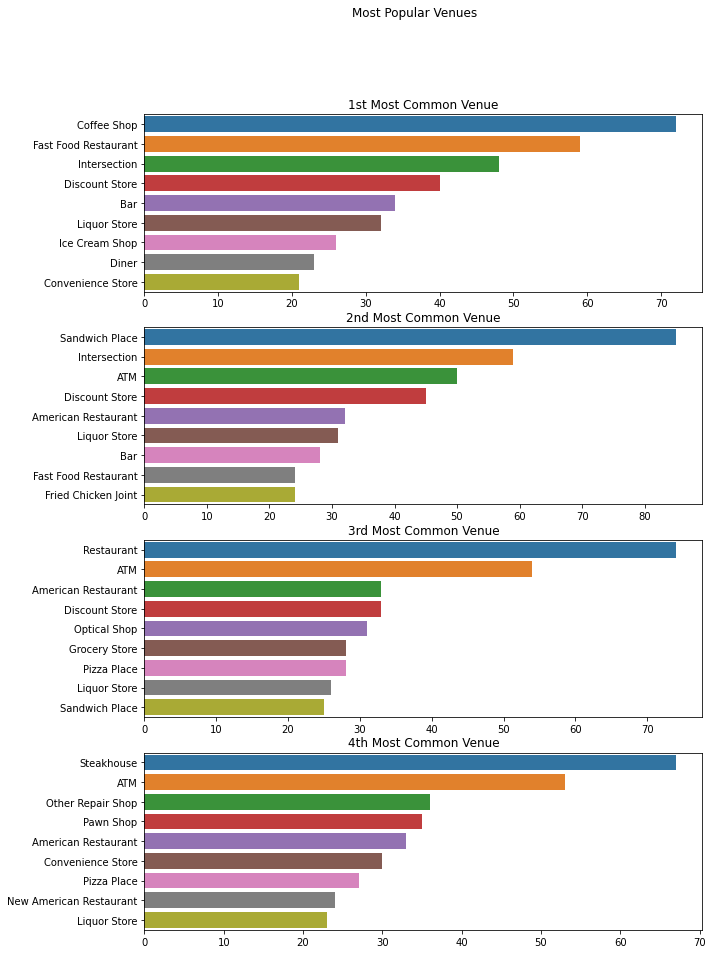

In [1043]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(10, 15))
fig.suptitle('Most Popular Venues')

# 1st
sns.barplot(ax=axes[0], x=a.values, y=a.index)
axes[0].set_title('1st Most Common Venue')

# 2nd
sns.barplot(ax=axes[1], x=b.values, y=b.index)
axes[1].set_title('2nd Most Common Venue')

# 3rd
sns.barplot(ax=axes[2], x=c.values, y=c.index)
axes[2].set_title('3rd Most Common Venue')

# 4th
sns.barplot(ax=axes[3], x=d.values, y=d.index)
axes[3].set_title('4th Most Common Venue')
